In [1]:
from donut import *
import random
import pickle
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#randSeed = int(random.random()*100000)
randSeed = random.randint(0,1000000)

w = cruller.WordList()
w.LoadFromFile("/Users/Rylan/cisc/creamTeam/wordLists/WordList_100000_combined_check.dat")
w = sprinkles.MostCommon(w,20000)
w.SetSeed(randSeed)

k = bearclaw.MakeStandardKeyboard()
k.SetSeed(randSeed)
k.RemoveKey('.')
kStan = k

ivL = 25
nIt = 20
Xscale = 0.75
Yscale = 0.5
corr = 0.0

#NN and training set details
nData = 100000
nInputs = 11
nOut = 1
fracSame = 0.5
fracRand = 0.0

In [2]:
model = []

for i in range(5):
    model.append(cruller.SimpleInterpolationModel())
    model[i].SetXScale(Xscale)
    model[i].SetYScale(Yscale)
    model[i].SetCorrelation(corr)
    model[i].SetVectorLength(ivL)
    model[i].SetSeed(randSeed+i)

model[0].Interpolation = cruller.CubicSplineInterpolation
model[1].Interpolation = cruller.ModCubicSplineInterpolation
model[2].Interpolation = cruller.HermiteCubicSplineInterpolation
model[3].Interpolation = cruller.MonotonicCubicSplineInterpolation
model[4].Interpolation = cruller.SpatialInterpolation

modelL = cruller.SimpleInterpolationModel()
modelL.SetVectorLength(ivL)

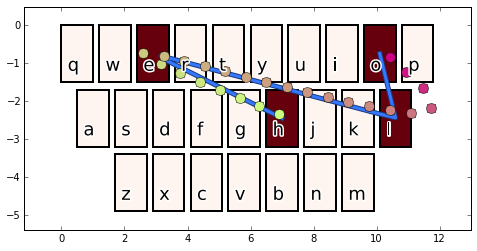

In [3]:
bearclaw.DrawKeyboard(k,inputvector=model[0].RandomVector("hello",k),perfectvector=modelL.PerfectVector("hello",k),frequencymap="hello",colormap=mpl.cm.Reds,figsize=(8,4),nopalette=True)

In [4]:
def possibilities(word,k):
    matches = []
    for i in range(nIt):
        iv = model[0].RandomVector(word,k)
        try:
            matches += w.SubstringMatches(iv.StringForm(k))
        except:
            print()
            print(i)
            print(word)            
    return list(set(matches))

In [5]:
trainingSet = []
modelN = [0,0,0,0,0]

from datetime import datetime

nMatch,match,wzero = 0,0,0
t1 = datetime.now()
for i in range(nData):
    if(i%20000==0):
        print(datetime.now()-t1)
        print(str(i)+" input sets computed")
    w1 = w.RandomWord()
    k.Randomize()
    randN = random.random()
    j = random.randint(0,len(model)-1)
    iv1 = model[j].RandomVector(w1,k)
    modelN[j]+=1
    
    wlist = possibilities(w1,k)
    if (len(wlist) == 0):
        ivP = modelL.PerfectVector(w1,k)
        trainingSet.append((0.1,cruller.CreateNeuralNetworkInputs(iv1,ivP)))
        wzero+=1
    else:        
        if w1 in wlist:
            match+=1
        else:
            nMatch+=1
        for w2 in wlist:
            ivP = modelL.PerfectVector(w2,k)
            if w2 == w1:
                trainingSet.append((0.1,cruller.CreateNeuralNetworkInputs(iv1,ivP)))        
            else:
                trainingSet.append((0.9,cruller.CreateNeuralNetworkInputs(iv1,ivP)))

print(datetime.now()-t1)

0:00:00.000645
0 input sets computed
0:04:40.611073
20000 input sets computed
0:09:08.034901
40000 input sets computed
0:13:26.132703
60000 input sets computed
0:17:41.998133
80000 input sets computed
0:21:51.475256


In [6]:
print("Total Size:     ",len(trainingSet))
print("wlist = 0:      ",wzero)
print("w1 in wlist:    ",match)
print("w1 not in wlist:",nMatch)
print("All together:   ",wzero+match+nMatch)

listM = [ i for i in range(len(trainingSet)) if trainingSet[i][0]==0.1]
listNM = [ i for i in range(len(trainingSet)) if trainingSet[i][0]==0.9]
print("\nTotal Matching Pairs:    ",len(listM))
print("Total Non-Matching Pairs:",len(listNM))
print("\nAverage RadixList size:",len(trainingSet)/(match+nMatch))
nData = len(trainingSet)

Total Size:      1617412
wlist = 0:       1
w1 in wlist:     91487
w1 not in wlist: 8512
All together:    100000

Total Matching Pairs:     91488
Total Non-Matching Pairs: 1525924

Average RadixList size: 16.174281742817428


In [7]:
import os
outname = '/Users/Rylan/cisc/creamTeam/FANN/trainingData/ivL'+str(ivL)+'/'
filename = 'fann_trainingSet_RadixHLIv4_ivL25_5interps_1617k_onlyRadixPairs_WLmc20k_RandInterps_reversed0109_1.txt'
#filename = 'test.txt'
outname += filename

if not os.path.exists(outname):
    fout = open(outname, 'w')
else:
    print("Nice try, this filename already exists")

In [8]:
inString = str(nData)+" "+str(nInputs)+" "+str(nOut)+"\n"
fout.write(inString)

for i in range(nData):
    inString = ""
    for j in range(nInputs-1):
        inString += str(trainingSet[i][1][j])+" "
    inString += str("%f"%trainingSet[i][1][nInputs-1])+"\n"
    fout.write(inString)
    fout.write(str("%f"%trainingSet[i][0]+"\n"))
#    if(trainingSet[i][0] == 0.1):
#        fout.write(str(trainingSet[i][0])+"\n")
#    else:
#        fout.write(str(0)+"\n")
        
fout.close()   